In [5]:
from set_paths import create_path_dict
path_dict = create_path_dict(define_user = True, user = "b")

In [6]:
# import and clean SOEP IS data
from beliefs.process_soep_is import load_and_filter_soep_is
from beliefs.process_soep_is import add_covariates
df = load_and_filter_soep_is(path_dict)
df = add_covariates(df, path_dict)

798 observations in SOEP-IS pension beliefs survey.
798 left after dropping missing and unspecified sex.


c:\users\bruno\papers\policy_uncertainty\analysis\src\process_data\soep_vars\birth.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month[invalid_month] = 6


In [9]:
df

,,hid,cid,intid,im_107,exp_stop_work,exp_stop_work_rob_plus1,exp_stop_work_rob_minus1,exp_pens_uptake,exp_pens_uptake_rob_plus1,exp_pens_uptake_rob_minus1,...,age,education,health,time_to_ret,mu,sigma,ex_val,var,error_1,error_2
pid,syear,,,,,,,,,,,,,,,,,,,,,
9015602.0,2022.0,901563.0,952141.0,-8.0,1.0,65.0,60.0,30.0,67.0,20.0,30.0,...,27.0,1.0,0.0,40.0,68.000000,2.000000,68.658511,1.787387,1.068982e-03,9.260223e-02
9016402.0,2022.0,901644.0,955132.0,-8.0,1.0,70.0,0.0,0.0,70.0,0.0,0.0,...,32.0,1.0,1.0,38.0,2295.200745,38.564370,71.332911,0.438663,6.000149e-09,2.312519e-09
9021302.0,2022.0,902136.0,921815.0,-8.0,1.0,67.0,50.0,50.0,67.0,50.0,50.0,...,30.0,0.0,0.0,37.0,65.890932,0.492605,66.737024,0.042116,1.222295e-09,9.989086e-07
9024502.0,2022.0,902454.0,975800.0,-8.0,1.0,80.0,50.0,20.0,<NA>,<NA>,100.0,...,69.0,NaN,0.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
9029702.0,2022.0,902977.0,973475.0,-8.0,1.0,70.0,10.0,20.0,70.0,20.0,30.0,...,26.0,1.0,0.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41833901.0,2022.0,4183393.0,4183393.0,-8.0,1.0,70.0,60.0,10.0,66.0,<NA>,<NA>,...,61.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
41834101.0,2022.0,4183415.0,4183415.0,-8.0,1.0,65.0,0.0,100.0,60.0,100.0,0.0,...,55.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
41834102.0,2022.0,4183415.0,4183415.0,-8.0,1.0,60.0,100.0,0.0,65.0,0.0,0.0,...,54.0,1.0,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN


** SRA Beliefs ** 

In [10]:
from specs.derive_specs import read_and_derive_specs
specs = read_and_derive_specs(path_dict["specs"])
from beliefs.sra_beliefs.est_SRA_expectations import estimate_truncated_normal
df_truncated_normal = estimate_truncated_normal(df, paths=path_dict, options=specs)



TypeError: boolean value of NA is ambiguous

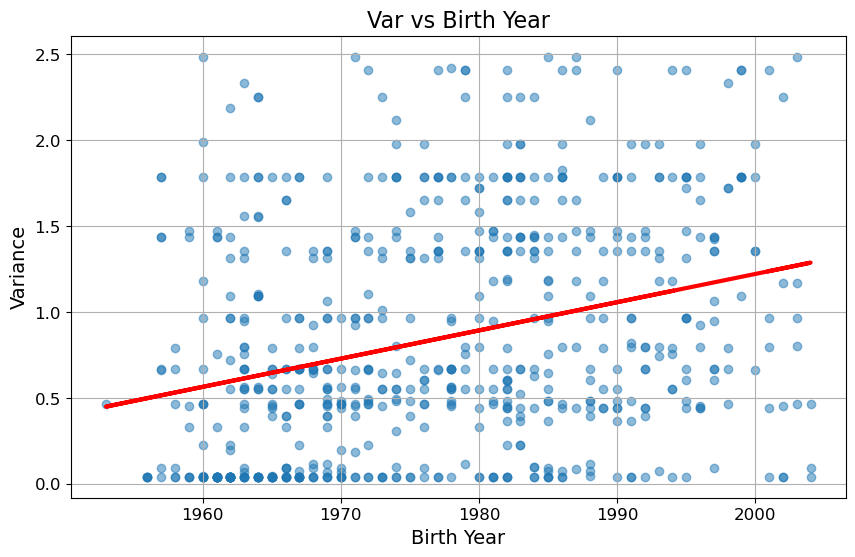

In [15]:
# plot var (y) vs gebjahr (x) with trendline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df_truncated_normal["gebjahr"], df_truncated_normal["var"], alpha=0.5)
plt.title("Var vs Birth Year")
plt.xlabel("Birth Year")
plt.ylabel("Variance")
import numpy as np
z = np.polyfit(df_truncated_normal["gebjahr"], df_truncated_normal["var"], 1)
p = np.poly1d(z)
plt.plot(df_truncated_normal["gebjahr"], p(df_truncated_normal["gebjahr"]), color='red')
plt.grid()



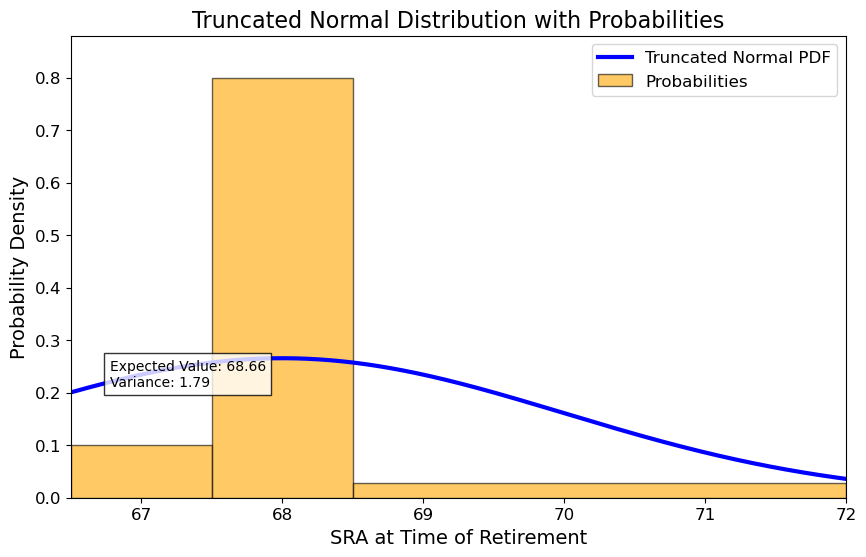

In [16]:
from  beliefs.sra_beliefs.sra_plots import plot_truncated_normal_for_response

response = [10, 80, 10]
plot_truncated_normal_for_response(response, options=specs)




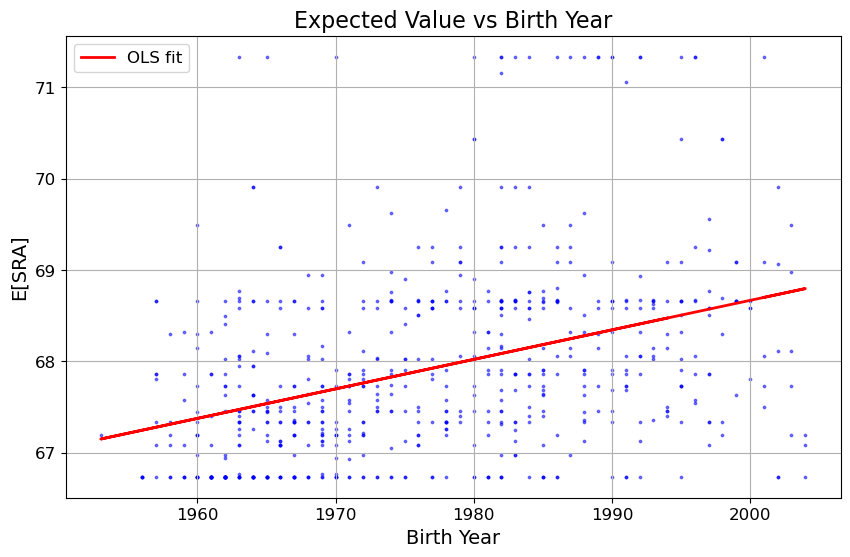

In [17]:
from beliefs.sra_beliefs.sra_plots import plot_expected_sra_vs_birth_year

plot_expected_sra_vs_birth_year(df_truncated_normal)

In [20]:
df_truncated_normal.rename(columns={"fweight": "fweights"}, inplace=True)


In [21]:
from beliefs.sra_beliefs.est_SRA_random_walk import est_SRA_params

alpha, sigma_sq = est_SRA_params(path_dict, df_truncated_normal)

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.575
Model:                            WLS   Adj. R-squared (uncentered):              0.575
Method:                 Least Squares   F-statistic:                              746.6
Date:                Tue, 03 Jun 2025   Prob (F-statistic):                   1.46e-104
Time:                        17:51:18   Log-Likelihood:                            -inf
No. Observations:                 552   AIC:                                        inf
Df Residuals:                     551   BIC:                                        inf
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\users\bruno\papers\policy_uncertainty\analysis\src\beliefs\sra_beliefs\est_SRA_random_walk.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exp_SRA_increase"] = df["ex_val"] - df["current_SRA"]
c:\Users\bruno\miniconda3\envs\policy_uncertainty\lib\site-packages\statsmodels\regression\linear_model.py:807: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))
